# Neo4Jupyter
Based on examples available at: http://nicolewhite.github.io/neo4j-jupyter/hello-world.html

In [4]:
from py2neo import Graph, Node, Relationship

### Authenticate
If you do not disable the authentication, you need to authenticate first.

To disable the authentication: 
* Go to the location where you create your database (when you initialize the Neo4j server) 
* Edit the file ".neo4j.conf". 
* Change the option **dbms.security.auth_enable** from **true** to **false**.
* Restart the server

In [5]:
# you do not need this if you disable the authentication
from py2neo import authenticate
authenticate("localhost:7474", "neo4j", "password")

### Starting the Graphic

In [6]:
graph = Graph()
graph.delete_all()

In [7]:
nicole = Node("Person", name="Nicole", age=24)
drew = Node("Person", name="Drew", age=20)

mtdew = Node("Drink", name="Mountain Dew", calories=9000)
cokezero = Node("Drink", name="Coke Zero", calories=0)

coke = Node("Manufacturer", name="Coca Cola")
pepsi = Node("Manufacturer", name="Pepsi")

graph.create(nicole | drew | mtdew | cokezero | coke | pepsi)

### Visualization
In order to visualize the graphic, you need to use the vis.py script. Also you need to create a "figure" folder (if it does not exist).

This script is available inside the script folder. 

If you change the location of the script folder, you need to modify the vis.py script in order to point to the correct location for the CSS library.

In [8]:
from scripts.vis import draw

#### Nodes

In [9]:
options = {"Person": "name", "Drink": "name", "Manufacturer": "name"}
draw(graph, options)

#### Relationship

In [10]:
from py2neo import Relationship

graph.create(Relationship(nicole, "LIKES", cokezero))
graph.create(Relationship(nicole, "LIKES", mtdew))
graph.create(Relationship(drew, "LIKES", mtdew))
graph.create(Relationship(coke, "MAKES", cokezero))
graph.create(Relationship(pepsi, "MAKES", mtdew))

draw(graph, options)

#### Cypher

In [11]:
query = """
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name AS name, drink.name AS drink
"""

data = graph.run(query)

for d in data:
    print(d)

('name': 'Drew', 'drink': 'Mountain Dew')
('name': 'Nicole', 'drink': 'Mountain Dew')
('name': 'Nicole', 'drink': 'Coke Zero')


In [13]:
%load_ext cypher

/Users/gusbru/anaconda/envs/serenata_de_amor/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/gusbru/anaconda/envs/serenata_de_amor/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [14]:
%%cypher
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name, drink.name, drink.calories

3 rows affected.


person.name,drink.name,drink.calories
Drew,Mountain Dew,9000
Nicole,Mountain Dew,9000
Nicole,Coke Zero,0


#### NetworkX

3 rows affected.


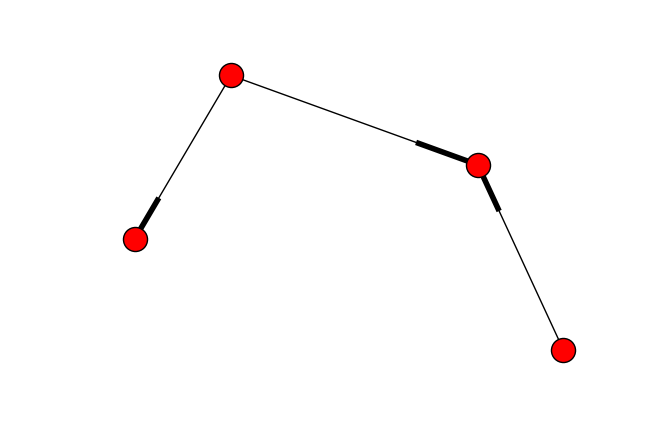

In [15]:
import networkx as nx
%matplotlib inline

results = %cypher MATCH p = (:Person)-[:LIKES]->(:Drink) RETURN p

g = results.get_graph()

nx.draw(g)

#### Pandas

In [16]:
results = %cypher MATCH (person:Person)-[:LIKES]->(drink:Drink) \
                  RETURN person.name AS name, drink.name AS drink
    
df = results.get_dataframe()

df

3 rows affected.


,name,drink
0,Drew,Mountain Dew
1,Nicole,Mountain Dew
2,Nicole,Coke Zero


In [21]:
df.head()

,name,drink
0,Nicole,Mountain Dew
1,Nicole,Coke Zero
2,Drew,Mountain Dew


#### JGraph

In [17]:
from py2neo import Graph as PGraph
import jgraph

neo4j = PGraph()

query = """
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name AS source, drink.name AS target
"""

data = neo4j.run(query)
tups = []

for d in data:
    tups.append((d["source"], d["target"]))

In [18]:
ig = jgraph.draw(tups)

In [19]:
import jgraph
jgraph.draw([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 2)])